<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Функции-и-библиотеки" data-toc-modified-id="Функции-и-библиотеки-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Функции и библиотеки</a></span></li><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Разделение-исходных-данные-на-обучающую,-валидационную-и-тестовую-выборки" data-toc-modified-id="Разделение-исходных-данные-на-обучающую,-валидационную-и-тестовую-выборки-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Разделение исходных данные на обучающую, валидационную и тестовую выборки</a></span></li><li><span><a href="#Исследование-качества-разных-моделей" data-toc-modified-id="Исследование-качества-разных-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследование качества разных моделей</a></span><ul class="toc-item"><li><span><a href="#модель-&quot;Решающее-дерево&quot;" data-toc-modified-id="модель-&quot;Решающее-дерево&quot;-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>модель "Решающее дерево"</a></span></li><li><span><a href="#модель-&quot;Случайный-лес&quot;" data-toc-modified-id="модель-&quot;Случайный-лес&quot;-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>модель "Случайный лес"</a></span></li><li><span><a href="#модель-&quot;Логистическая-регрессия&quot;" data-toc-modified-id="модель-&quot;Логистическая-регрессия&quot;-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>модель "Логистическая регрессия"</a></span><ul class="toc-item"><li><span><a href="#Влияние-параметров-на-качество-моделирования" data-toc-modified-id="Влияние-параметров-на-качество-моделирования-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Влияние параметров на качество моделирования</a></span></li></ul></li></ul></li><li><span><a href="#Проверка-качества-модели" data-toc-modified-id="Проверка-качества-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка качества модели</a></span></li><li><span><a href="#Заключение" data-toc-modified-id="Заключение-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Заключение</a></span></li></ul></div>

# Анализ поведения клиентов телеком-компании

**Входные данные** —  данные пользователей телеком-компании «Мегалайн» за 2018 год (предобработанные).

**Дальнейшее использование результатов исследования** — построение системы, способной проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».

**Цель исследования** 
1. Построение модели со значением accuracy больше либо равной 0.75. 

2. Проверка accuracy на тестовой выборке 


## Функции и библиотеки

In [1]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression 

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

## Обзор данных

**Описание данных**

Каждый объект в наборе данных — информация о поведении одного пользователя за месяц. Известно:
- сalls — количество звонков,
- minutes — суммарная длительность звонков в минутах,
- messages — количество sms-сообщений,
- mb_used — израсходованный интернет-трафик в Мб,
- is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

In [2]:
try:
    df = pd.read_csv ('D:/Data for projects/users_behavior.csv')

except: #метод try/except применяется для открытия блокнота по адресу Практикума
    df = pd.read_csv ('/datasets/users_behavior.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
df.nunique()

calls        184
minutes     3142
messages     180
mb_used     3203
is_ultra       2
dtype: int64

In [5]:
df['is_ultra'].value_counts() #оценим достаточность разнообразия данных для обучения

0    2229
1     985
Name: is_ultra, dtype: int64

<div style="border:solid blue 2px; padding: 20px">

Качество представленных данных позволяет использовать их без проведения предобработки
    
вызывает сомнение достаточность объема данных (при не достаточном объеме данных выделение валидационной выборки за счет данных для обучения негативно скажется на качестве обучения модели)

## Разделение исходных данные на обучающую, валидационную и тестовую выборки

In [6]:
features = df.drop('is_ultra',axis=1) # признаки 
target = df['is_ultra'] # целевой признак

In [7]:
features, features_test, target, target_test = train_test_split(
    features, target, test_size=0.20, random_state=404) #выделение тестовой выборки

In [8]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=404) #выделение обучающей и валидационной выборки

In [9]:
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)
print(target_train.shape)
print(target_valid.shape)
print(target_test.shape)

(1928, 4)
(643, 4)
(643, 4)
(1928,)
(643,)
(643,)


## Исследование качества разных моделей

### модель "Решающее дерево"

In [32]:
best_model_tree = None
best_result_tree = 0
depth = 0

for _ in range(1,30):
    model = DecisionTreeClassifier(random_state=404, max_depth=_)
    model.fit(features_train, target_train) # обучение модели
    predictions = model.predict(features_valid) 
    
    accuracy = accuracy_score(target_valid, predictions) # расчет качества модели
    
    if accuracy > best_result_tree:
        best_model_tree = model # сохранение наилучшей модели
        best_result_tree = accuracy #  сохранение наилучшего значения метрики accuracy
        depth = _ # сохранение глубины лучшей модели

print(f'Accuracy наилучшей модели : {round(best_result_tree,4)}, max_depth = {depth}')

Accuracy наилучшей модели : 0.7838, max_depth = 3


<div style="border:solid blue 2px; padding: 20px">

оптимальная точность модели достигается при глубине 3, точность соответствует заявленнй в ТЗ (>0.75)

### модель "Случайный лес"

In [31]:
best_model_forest = None
best_result_forest = 0
n_estimators = 0

for _ in range(1, 100):
    model = RandomForestClassifier(random_state=404, n_estimators=_) 
    model.fit(features_train,target_train) # обучение модели
    predictions = model.predict(features_valid)
    accuracy = accuracy_score(predictions, target_valid) # расчет качества модели
    
    if accuracy > best_result_forest:
        best_model_forest = model # сохранение наилучшей модели
        best_result_forest = accuracy #  сохранение наилучшего значения метрики accuracy
        n_estimators = _ # сохранение количества деревьев лучшей модели

print(f'Accuracy наилучшей модели: {round(best_result_forest,4)}, кол-во деревьев: {n_estimators}')

Accuracy наилучшей модели: 0.7963, кол-во деревьев: 29


<div style="border:solid blue 2px; padding: 20px">

оптимальная точность модели достигается при количестве деревьев 29, точность соответствует заявленнй в ТЗ (>0.75)

### модель "Логистическая регрессия"

In [34]:
best_model_log_reg = None
best_result_log_reg = 0
max_iter_ = 0

for _ in range(1,150,10):
    model = LogisticRegression(random_state=404, solver='lbfgs', max_iter=_) 
    model.fit(features_train,target_train) # обучение модели
    predictions = model.predict(features_valid)
    accuracy = accuracy_score(predictions, target_valid) # расчет качества модели
    
    if accuracy > best_result_log_reg:
        best_model_log_reg = model # сохранение наилучшей модели
        best_result_log_reg = accuracy #  сохранение наилучшего значения метрики accuracy
        max_iter_ = _ # сохранение количества иттераций лучшей модели

print(f'Accuracy наилучшей модели: {round(best_result_log_reg,4)}, количество иттераций: {max_iter_}')

D:\Anaconda\envs\praktikum_env\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\envs\praktikum_env\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\envs\praktikum_env\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\envs\praktikum_env\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\envs\praktikum_env\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.


Accuracy наилучшей модели: 0.7278, количество иттераций: 71


<div style="border:solid blue 2px; padding: 20px">

оптимальная точность модели достигается при количестве иттераций 71, точность соответствует заявленнй в ТЗ (=0.75)

#### Влияние параметров на качество моделирования

Рассмотрим возможность повышения качества модели "Логистическая регрессия" за счет обучения ее на обогащенных данных

Выбор модели для исследования основан на предположении о том, что информация о ценах за прерасходованные минуты, сообщения и траффик позволит модели лучше определить прогнозируемые веса

In [13]:
df_check = df.copy()

возьмем данные о тарифах из предыдущего кейса

In [14]:
tariffs = pd.DataFrame(columns=['messages_included', 
                                'mb_per_month_included', 
                                'minutes_included',
                                'rub_monthly_fee', 
                                'rub_per_gb', 
                                'rub_per_message', 
                                'rub_per_minute',
                                'tariff_name'])
tariffs.loc[0,:] = [50, 15360, 500, 550, 200, 3, 3, 'smart']
tariffs.loc[1,:] = [1000, 30720, 3000, 1950, 150, 1, 1, 'ultra']

рассчитаем переплату пользователей за перерасход минут, сообщений и интернет трафика

**при расчете взяты данные тарифа Smart, по скольку в рамках задачи требуется выявить пользователей которым может быть интересен тариф Ultra**, предположим что данным пользователям условия тарифа Smart не достаточны

In [15]:
df_check.loc[:,'minutes_payment'] = (df_check['minutes'] - tariffs.loc[0,'minutes_included']).clip(lower=0) * tariffs.loc[0,'rub_per_minute']
df_check.loc[:,'messages_payment'] = (df_check['messages'] - tariffs.loc[0,'messages_included']).clip(lower=0) * tariffs.loc[0,'rub_per_message']
df_check.loc[:,'mb_payment'] = round((df_check['mb_used'] - tariffs.loc[0,'mb_per_month_included']).clip(lower=0)/1024) * tariffs.loc[0,'rub_per_gb'] 

рассчитаем общие затраты пользователей (сложив переплату)

In [16]:
df_check['total_cost'] = df_check['minutes_payment'] + df_check['messages_payment'] + df_check['mb_payment'] 

разделим данные на обучающую, валидационную и тестовую выборку

In [17]:
features_check =  df_check.drop(['is_ultra'],axis=1)  #.drop(['minutes', 'messages', 'mb_used', 'is_ultra','minutes_payment','messages_payment','mb_payment'],axis=1) # признаки
target_check = df_check['is_ultra'] # целевой признак

In [18]:
features_check, features_test_check, target_check, target_test_check = train_test_split(
    features_check, target_check, test_size=0.20, random_state=404)

features_train_check, features_valid_check, target_train_check, target_valid_check = train_test_split(
    features_check, target_check, test_size=0.25, random_state=404)

проверим качество работы модели "Логистическая регрессия" на обогащенных данных

In [35]:
best_result_check_log_reg = 0
max_iter_ = 0

for _ in range(1,150,10):
    model = LogisticRegression(random_state=404, solver='lbfgs', max_iter=_)
    model.fit(features_train_check, target_train_check) # обучение модели
    predictions = model.predict(features_valid_check) 
    
    accuracy = accuracy_score(target_valid_check, predictions) # расчет качества модели
    
    if accuracy > best_result_check_log_reg:
        best_result_check_log_reg = accuracy #  сохранение наилучшего значения метрики accuracy
        max_iter_ = _ # сохранение количества иттераций лучшей модели

print(f'Accuracy наилучшей модели: {round(best_result_check_log_reg,4)}, количество иттераций: {max_iter_}')

D:\Anaconda\envs\praktikum_env\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\envs\praktikum_env\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\envs\praktikum_env\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\envs\praktikum_env\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\envs\praktikum_env\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.


Accuracy наилучшей модели: 0.7807, количество иттераций: 21


<div style="border:solid blue 2px; padding: 20px">

оптимальная точность модели достигается при количестве иттераций 21, точность соответствует заявленнй в ТЗ (=0.75) и **превосходит точность модели, обученной на исходных данных на 5%**

## Проверка качества модели

Исследуем зависимость качества моделей от гиперпараметров (на валидационной выборке) 

In [20]:
result_tree = pd.DataFrame(columns=['accuracy'])

for _ in range(1,30):
    model = DecisionTreeClassifier(random_state=404, max_depth=_)
    model.fit(features_train, target_train) # обучение модели
    predictions = model.predict(features_valid) 
    
    accuracy = accuracy_score(target_valid, predictions) # расчет качества модели
     
    result_tree.loc[_,'accuracy'] = accuracy

In [21]:
result_forest = pd.DataFrame(columns=['accuracy'])

for _ in range(1,40):
    model = RandomForestClassifier(random_state=404, n_estimators=_)
    model.fit(features_train, target_train) # обучение модели
    predictions = model.predict(features_valid) 
    
    accuracy = accuracy_score(target_valid, predictions) # расчет качества модели
     
    result_forest.loc[_,'accuracy'] = accuracy

In [22]:
result_log_reg = pd.DataFrame(columns=['accuracy'])

for _ in range(1,150,10):
    model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=_)
    model.fit(features_train, target_train) # обучение модели
    predictions = model.predict(features_valid) 
    
    accuracy = accuracy_score(target_valid, predictions) # расчет качества модели
     
    result_log_reg.loc[_,'accuracy'] = accuracy

D:\Anaconda\envs\praktikum_env\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\envs\praktikum_env\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\envs\praktikum_env\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\envs\praktikum_env\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda\envs\praktikum_env\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.


Text(0.5, 0, 'кол-во итераций')

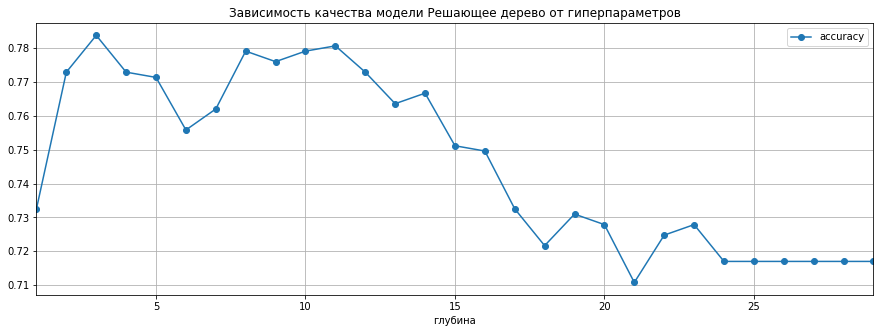

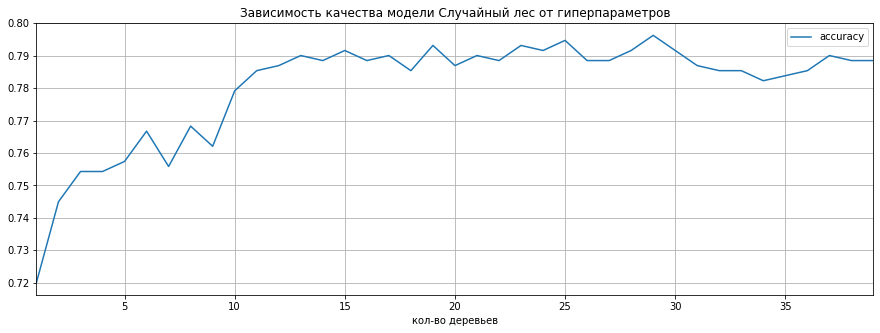

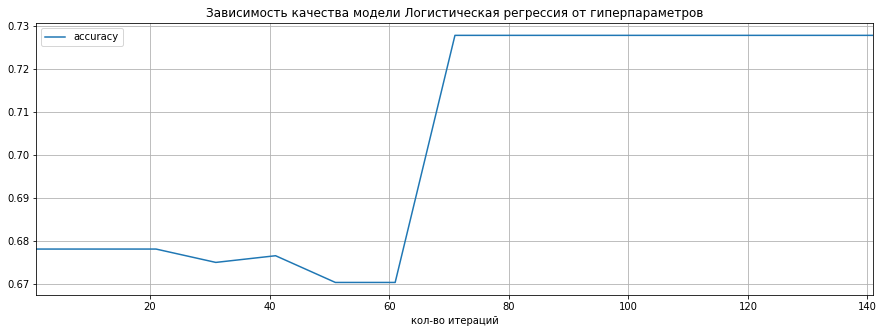

In [23]:
result_tree.plot(style='o-',
                 grid=True,
                figsize=(15,5),
                title='Зависимость качества модели Решающее дерево от гиперпараметров').set_xlabel('глубина')

result_forest.plot(grid=True,
                  figsize=(15,5),
                  title='Зависимость качества модели Случайный лес от гиперпараметров').set_xlabel('кол-во деревьев')

result_log_reg.plot(grid=True,
                  figsize=(15,5),
                   title='Зависимость качества модели Логистическая регрессия от гиперпараметров').set_xlabel('кол-во итераций')

<div style="border:solid blue 2px; padding: 20px">

на графиках представлена зависимость точности от гиперпараметров моделей

Проверим качество моделей на тестовых данных

In [24]:
predictions = best_model_tree.predict(features_test)

round(accuracy_score(target_test, predictions),4)

0.8072

In [25]:
predictions = best_model_forest.predict(features_test)

round(accuracy_score(target_test, predictions),4)

0.8149

In [26]:
predictions = best_model_log_reg.predict(features_test)

round(accuracy_score(target_test, predictions),4)

0.7465

## Заключение

В рамках настоящего исследования:

- проведено обучение моделей "Решающее дерево", "Случайный лес", "Логистическая регрессия"
- исследовано качество обученных моделей для разных гиперпараметров. Показатели точности моделей:
    - "Решающее дерево" (Accuracy наилучшей модели : 0.8072, max_depth = 3)  
    - "Случайный лес" (Accuracy наилучшей модели: 0.8149, кол-во деревьев: 29)
    - "Логистическая регрессия" (Accuracy наилучшей модели: 0.7465, количество иттераций: 71)
- исследована возможность повышения качества модели "Логистическая регрессия" за счет обучения ее на обогащенных данных. Показатели точности модели:
    - Accuracy наилучшей модели : 0.7807, количество иттераций: 21
    
       
**По результатам исследования выявлена возможность повышения качества предсказаний модели "Логистическая регрессия" за счет обогащения данных (78% правильных результатов по сравнению с 74,6%) на фоне снижения количества иттераций**

Так же стоит отметить, что не смотря на то что данных достаточно для обучения, увеличение объема данных способно улучшить качество работы моделей